## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- testCases provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import h5py
import math
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
print("scipy version: {}".format(scipy.__version__))   

TensorFlow version: 2.1.0
Eager execution: True
scipy version: 1.4.1


In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout

In [212]:
# Build the Sequential feedforward neural network model
model = Sequential([
    InputLayer(input_shape=(12288,)),
    Dropout(0.2),
    Dense(20,activation='relu',   kernel_initializer='he_normal',bias_initializer='zeros',name='l1'),
    Dense(7, activation='relu',   kernel_initializer='he_normal',bias_initializer='zeros',name='l2'),
    Dense(5, activation='relu',   kernel_initializer='he_normal',bias_initializer='zeros',name='l3'),
    Dense(1, activation='sigmoid',kernel_initializer='GlorotNormal',bias_initializer='zeros',name='l4')]
)


In [213]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 12288)             0         
_________________________________________________________________
l1 (Dense)                   (None, 20)                245780    
_________________________________________________________________
l2 (Dense)                   (None, 7)                 147       
_________________________________________________________________
l3 (Dense)                   (None, 5)                 40        
_________________________________________________________________
l4 (Dense)                   (None, 1)                 6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile (
#    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0075),
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.BinaryCrossentropy(),
    metrics= [tf.keras.metrics.BinaryAccuracy()]
)

In [215]:
def load_data_new():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [216]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data_new()

IndexError: index 12 is out of bounds for axis 1 with size 1

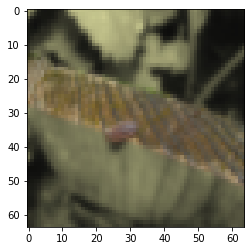

In [233]:
# Example of a picture
index = 12
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [218]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [219]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)  # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

train_y = train_y.T
test_y = test_y.T
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)
train_y's shape: (209, 1)
test_y's shape: (50, 1)


In [220]:
# Fit the model
history=model.fit(train_x,train_y ,epochs= 1500,batch_size =64)

Train on 209 samples
Epoch 1/1500
209/209 [==============================] - 0s 2ms/sample - loss: 0.8001 - binary_accuracy: 0.6555
Epoch 2/1500
209/209 [==============================] - 0s 248us/sample - loss: 0.6540 - binary_accuracy: 0.6555
Epoch 3/1500
209/209 [==============================] - 0s 282us/sample - loss: 0.6529 - binary_accuracy: 0.6555
Epoch 4/1500
209/209 [==============================] - 0s 272us/sample - loss: 0.6514 - binary_accuracy: 0.6555
Epoch 5/1500
209/209 [==============================] - 0s 277us/sample - loss: 0.6493 - binary_accuracy: 0.6555
Epoch 6/1500
209/209 [==============================] - 0s 296us/sample - loss: 0.6458 - binary_accuracy: 0.6555
Epoch 7/1500
209/209 [==============================] - 0s 286us/sample - loss: 0.6444 - binary_accuracy: 0.6555
Epoch 8/1500
209/209 [==============================] - 0s 301us/sample - loss: 0.6468 - binary_accuracy: 0.6555
Epoch 9/1500
209/209 [==============================] - 0s 308us/sample - los

209/209 [==============================] - 0s 294us/sample - loss: 0.2470 - binary_accuracy: 0.9426
Epoch 144/1500
209/209 [==============================] - 0s 282us/sample - loss: 0.1971 - binary_accuracy: 0.9474
Epoch 145/1500
209/209 [==============================] - 0s 305us/sample - loss: 0.1921 - binary_accuracy: 0.9809
Epoch 146/1500
209/209 [==============================] - 0s 358us/sample - loss: 0.1822 - binary_accuracy: 0.9474
Epoch 147/1500
209/209 [==============================] - 0s 315us/sample - loss: 0.1788 - binary_accuracy: 0.9665
Epoch 148/1500
209/209 [==============================] - 0s 315us/sample - loss: 0.1815 - binary_accuracy: 0.9617
Epoch 149/1500
209/209 [==============================] - 0s 294us/sample - loss: 0.1649 - binary_accuracy: 0.9809
Epoch 150/1500
209/209 [==============================] - 0s 272us/sample - loss: 0.1623 - binary_accuracy: 0.9856
Epoch 151/1500
209/209 [==============================] - 0s 310us/sample - loss: 0.1655 - bina

Epoch 214/1500
209/209 [==============================] - 0s 296us/sample - loss: 0.1013 - binary_accuracy: 0.9856
Epoch 215/1500
209/209 [==============================] - 0s 265us/sample - loss: 0.0937 - binary_accuracy: 0.9904
Epoch 216/1500
209/209 [==============================] - 0s 258us/sample - loss: 0.1711 - binary_accuracy: 0.9569
Epoch 217/1500
209/209 [==============================] - 0s 267us/sample - loss: 0.1416 - binary_accuracy: 0.9713
Epoch 218/1500
209/209 [==============================] - 0s 262us/sample - loss: 0.1105 - binary_accuracy: 0.9809
Epoch 219/1500
209/209 [==============================] - 0s 282us/sample - loss: 0.1333 - binary_accuracy: 0.9713
Epoch 220/1500
209/209 [==============================] - 0s 272us/sample - loss: 0.1394 - binary_accuracy: 0.9617
Epoch 221/1500
209/209 [==============================] - 0s 267us/sample - loss: 0.1111 - binary_accuracy: 0.9904
Epoch 222/1500
209/209 [==============================] - 0s 255us/sample - loss

209/209 [==============================] - 0s 274us/sample - loss: 0.0773 - binary_accuracy: 0.9665
Epoch 357/1500
209/209 [==============================] - 0s 301us/sample - loss: 0.0699 - binary_accuracy: 0.9809
Epoch 358/1500
209/209 [==============================] - 0s 282us/sample - loss: 0.0607 - binary_accuracy: 0.9809
Epoch 359/1500
209/209 [==============================] - 0s 277us/sample - loss: 0.0477 - binary_accuracy: 0.9904
Epoch 360/1500
209/209 [==============================] - 0s 277us/sample - loss: 0.0563 - binary_accuracy: 0.9856
Epoch 361/1500
209/209 [==============================] - 0s 272us/sample - loss: 0.0367 - binary_accuracy: 0.9904
Epoch 362/1500
209/209 [==============================] - 0s 267us/sample - loss: 0.0639 - binary_accuracy: 0.9761
Epoch 363/1500
209/209 [==============================] - 0s 267us/sample - loss: 0.0503 - binary_accuracy: 0.9856
Epoch 364/1500
209/209 [==============================] - 0s 258us/sample - loss: 0.0562 - bina

Epoch 498/1500
209/209 [==============================] - 0s 291us/sample - loss: 0.0326 - binary_accuracy: 0.9952
Epoch 499/1500
209/209 [==============================] - 0s 286us/sample - loss: 0.0471 - binary_accuracy: 0.9809
Epoch 500/1500
209/209 [==============================] - 0s 258us/sample - loss: 0.0576 - binary_accuracy: 0.9761
Epoch 501/1500
209/209 [==============================] - 0s 253us/sample - loss: 0.3419 - binary_accuracy: 0.8804
Epoch 502/1500
209/209 [==============================] - 0s 248us/sample - loss: 0.2540 - binary_accuracy: 0.8995
Epoch 503/1500
209/209 [==============================] - 0s 248us/sample - loss: 0.1310 - binary_accuracy: 0.9617
Epoch 504/1500
209/209 [==============================] - 0s 296us/sample - loss: 0.1150 - binary_accuracy: 0.9665
Epoch 505/1500
209/209 [==============================] - 0s 282us/sample - loss: 0.1227 - binary_accuracy: 0.9665
Epoch 506/1500
209/209 [==============================] - 0s 258us/sample - loss

209/209 [==============================] - 0s 434us/sample - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 641/1500
209/209 [==============================] - 0s 444us/sample - loss: 0.0233 - binary_accuracy: 0.9952
Epoch 642/1500
209/209 [==============================] - 0s 363us/sample - loss: 0.0213 - binary_accuracy: 0.9904
Epoch 643/1500
209/209 [==============================] - 0s 504us/sample - loss: 0.0157 - binary_accuracy: 0.9952
Epoch 644/1500
209/209 [==============================] - 0s 399us/sample - loss: 0.0565 - binary_accuracy: 0.9809
Epoch 645/1500
209/209 [==============================] - 0s 344us/sample - loss: 0.0183 - binary_accuracy: 0.9952
Epoch 646/1500
209/209 [==============================] - 0s 463us/sample - loss: 0.0924 - binary_accuracy: 0.9713
Epoch 647/1500
209/209 [==============================] - 0s 320us/sample - loss: 0.0678 - binary_accuracy: 0.9761
Epoch 648/1500
209/209 [==============================] - 0s 344us/sample - loss: 0.0499 - bina

Epoch 782/1500
209/209 [==============================] - 0s 367us/sample - loss: 0.0210 - binary_accuracy: 0.9952
Epoch 783/1500
209/209 [==============================] - 0s 427us/sample - loss: 0.0322 - binary_accuracy: 0.9904
Epoch 784/1500
209/209 [==============================] - 0s 422us/sample - loss: 0.0169 - binary_accuracy: 0.9904
Epoch 785/1500
209/209 [==============================] - 0s 317us/sample - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 786/1500
209/209 [==============================] - 0s 315us/sample - loss: 0.0342 - binary_accuracy: 0.9952
Epoch 787/1500
209/209 [==============================] - 0s 339us/sample - loss: 0.0080 - binary_accuracy: 1.0000
Epoch 788/1500
209/209 [==============================] - 0s 305us/sample - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 789/1500
209/209 [==============================] - 0s 339us/sample - loss: 0.0198 - binary_accuracy: 0.9952
Epoch 790/1500
209/209 [==============================] - 0s 377us/sample - loss

209/209 [==============================] - 0s 277us/sample - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 924/1500
209/209 [==============================] - 0s 303us/sample - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 925/1500
209/209 [==============================] - 0s 296us/sample - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 926/1500
209/209 [==============================] - 0s 298us/sample - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 927/1500
209/209 [==============================] - 0s 305us/sample - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 928/1500
209/209 [==============================] - 0s 305us/sample - loss: 0.0635 - binary_accuracy: 0.9856
Epoch 929/1500
209/209 [==============================] - 0s 282us/sample - loss: 0.0074 - binary_accuracy: 0.9952
Epoch 930/1500
209/209 [==============================] - 0s 296us/sample - loss: 0.0152 - binary_accuracy: 0.9952
Epoch 931/1500
209/209 [==============================] - 0s 291us/sample - loss: 0.0038 - bina

209/209 [==============================] - 0s 320us/sample - loss: 0.0163 - binary_accuracy: 0.9952
Epoch 1065/1500
209/209 [==============================] - 0s 339us/sample - loss: 0.0076 - binary_accuracy: 1.0000
Epoch 1066/1500
209/209 [==============================] - 0s 334us/sample - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 1067/1500
209/209 [==============================] - 0s 344us/sample - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 1068/1500
209/209 [==============================] - 0s 372us/sample - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 1069/1500
209/209 [==============================] - 0s 403us/sample - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 1070/1500
209/209 [==============================] - 0s 401us/sample - loss: 0.0200 - binary_accuracy: 0.9952
Epoch 1071/1500
209/209 [==============================] - 0s 510us/sample - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 1072/1500
209/209 [==============================] - 0s 439us/sample - loss: 0.004

209/209 [==============================] - 0s 344us/sample - loss: 0.0040 - binary_accuracy: 1.0000
Epoch 1205/1500
209/209 [==============================] - 0s 329us/sample - loss: 0.0135 - binary_accuracy: 0.9952
Epoch 1206/1500
209/209 [==============================] - 0s 334us/sample - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 1207/1500
209/209 [==============================] - 0s 329us/sample - loss: 0.0075 - binary_accuracy: 0.9952
Epoch 1208/1500
209/209 [==============================] - 0s 320us/sample - loss: 0.0052 - binary_accuracy: 1.0000
Epoch 1209/1500
209/209 [==============================] - 0s 339us/sample - loss: 0.0100 - binary_accuracy: 0.9952
Epoch 1210/1500
209/209 [==============================] - 0s 334us/sample - loss: 0.0092 - binary_accuracy: 0.9952
Epoch 1211/1500
209/209 [==============================] - 0s 341us/sample - loss: 0.0183 - binary_accuracy: 0.9904
Epoch 1212/1500
209/209 [==============================] - 0s 344us/sample - loss: 0.001

209/209 [==============================] - 0s 243us/sample - loss: 0.1089 - binary_accuracy: 0.9522
Epoch 1345/1500
209/209 [==============================] - 0s 248us/sample - loss: 0.0649 - binary_accuracy: 0.9809
Epoch 1346/1500
209/209 [==============================] - 0s 255us/sample - loss: 0.0291 - binary_accuracy: 0.9904
Epoch 1347/1500
209/209 [==============================] - 0s 243us/sample - loss: 0.0116 - binary_accuracy: 0.9952
Epoch 1348/1500
209/209 [==============================] - 0s 262us/sample - loss: 0.0428 - binary_accuracy: 0.9904
Epoch 1349/1500
209/209 [==============================] - 0s 253us/sample - loss: 0.0177 - binary_accuracy: 0.9952
Epoch 1350/1500
209/209 [==============================] - 0s 248us/sample - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 1351/1500
209/209 [==============================] - 0s 243us/sample - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 1352/1500
209/209 [==============================] - 0s 248us/sample - loss: 0.003

209/209 [==============================] - 0s 247us/sample - loss: 8.1298e-04 - binary_accuracy: 1.0000
Epoch 1485/1500
209/209 [==============================] - 0s 253us/sample - loss: 7.2099e-04 - binary_accuracy: 1.0000
Epoch 1486/1500
209/209 [==============================] - 0s 251us/sample - loss: 8.6560e-04 - binary_accuracy: 1.0000
Epoch 1487/1500
209/209 [==============================] - 0s 286us/sample - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 1488/1500
209/209 [==============================] - 0s 410us/sample - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 1489/1500
209/209 [==============================] - 0s 487us/sample - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 1490/1500
209/209 [==============================] - 0s 415us/sample - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 1491/1500
209/209 [==============================] - 0s 272us/sample - loss: 7.8962e-04 - binary_accuracy: 1.0000
Epoch 1492/1500
209/209 [==============================] - 0s 320us/samp

In [223]:
# Load the history into a pandas Dataframe
import pandas as pd

df=pd.DataFrame(history.history)

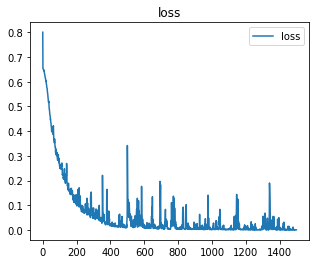

In [224]:
# Make a plot for the loss
df.plot(y='loss',title='loss',kind='line')

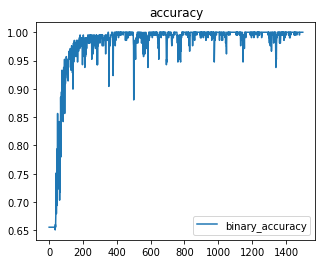

In [225]:
# Make a plot for the Accuracy
df.plot(y='binary_accuracy',title='accuracy',kind='line')

In [226]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_x,test_y)

50/50 [==============================] - 0s 2ms/sample - loss: 2.5760 - binary_accuracy: 0.7000


original shape:  (1000, 1500, 3)
new shape:  (1, 12288)
[[6.3087115e-05]]
your L-layer model predicts a "non-cat" picture.


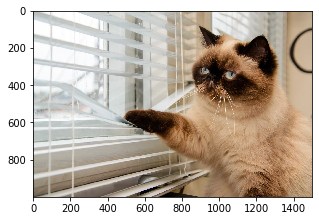

In [232]:
import imageio
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

my_image = "chat1.jpg" # change this to the name of your image file 
fname = "images/" + my_image
im = imageio.imread(fname, as_gray=False)
print("original shape: " , im.shape)

image_resized = resize(im, (64, 64),preserve_range=True).reshape((64*64*3,1)).T
image_resized = image_resized/255.
print("new shape: ", image_resized.shape)

my_predicted_image = model.predict(image_resized)
print(my_predicted_image)
if (np.squeeze(my_predicted_image)> 0.5):
    y_hat = 1
else:
    y_hat = 0
    

plt.imshow(im)
print ("your L-layer model predicts a \"" + classes[y_hat].decode("utf-8") +  "\" picture.")